In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


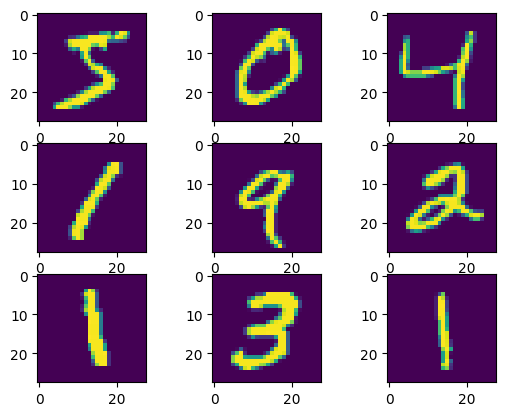

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])
	


In [4]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

c:\Users\USER\Desktop\MM\AI-ML-DL\mash\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.8761 - loss: 0.4339
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9642 - loss: 0.1209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9771 - loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.9827 - loss: 0.0558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.9865 - loss: 0.0440


In [9]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9764 - loss: 0.0868
[0.07314595580101013, 0.9793999791145325]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
7


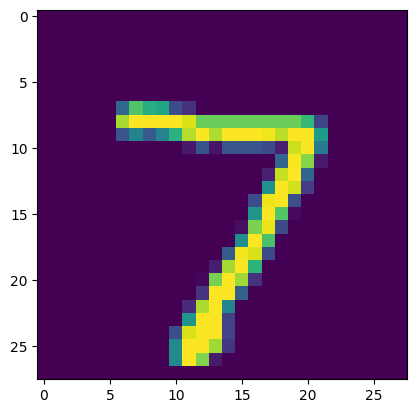

In [10]:
plt.imshow(test_images[0])
prediction=model.predict(test_images)
print(np.argmax(prediction[0]))